### 4. Take a grayscale image of size 512x512, add some Gaussian noise, and perform the following operations in the frequency domain:

        (b) Observe the ringing effect of an ideal low pass filter on the image.
            Use different radius (D₀) values for the ideal low pass filter and display their results.

In [36]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

### Add Gaussian Noise

In [37]:
# Mean (“centre”) of the distribution.
# Standard deviation (spread or “width”) of the distribution.

def add_gaussian_noise(image, mean=0, sigma=90):

    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + noise, 0, 255)

    return noisy_image.astype(np.uint8)

### DFT

In [38]:
def applyFFT(image):

    fftImage = np.fft.fftshift(np.fft.fft2(image))

    return fftImage

### IDFT

In [39]:
def applyIDFT(image):

    idftImage = np.fft.ifft2(np.fft.ifftshift(image)).real

    return idftImage

### Ideal LowPass Filter

In [40]:
def applyIdealLowPassFilter(image, D0):

    height, width = image.shape
    idealFilter = np.zeros(image.shape, dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            if (D <= D0):
                idealFilter[u, v] = 1

    filteredImage = image * idealFilter

    return filteredImage

In [41]:
originalImage = cv2.imread("img5.tif", cv2.IMREAD_GRAYSCALE)

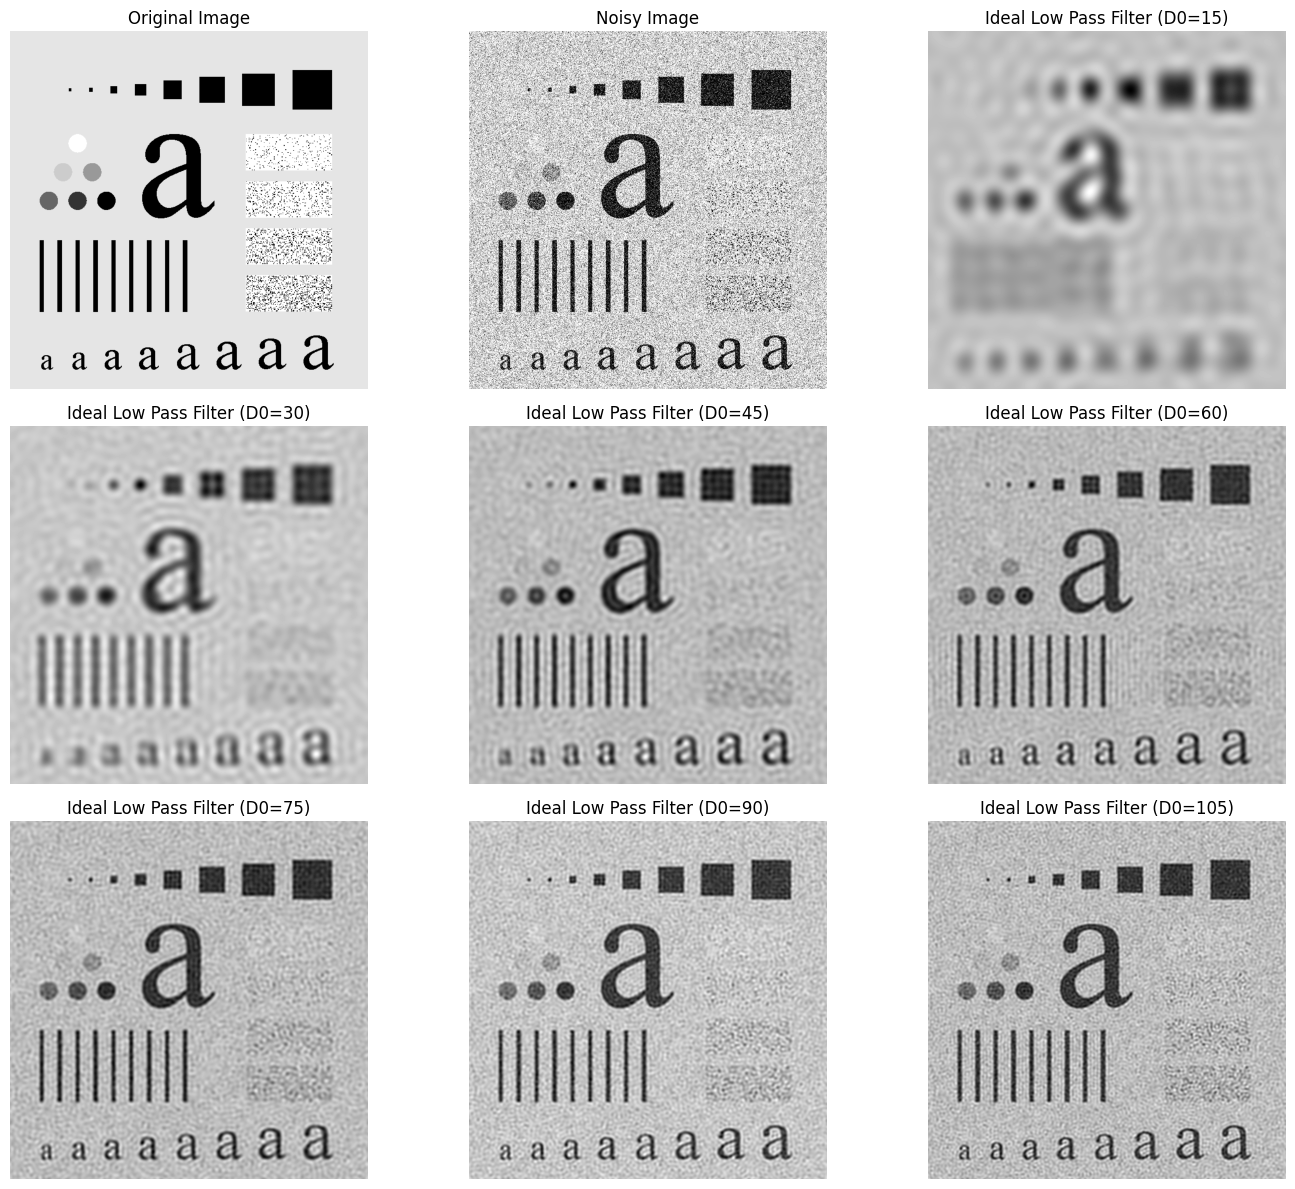

In [42]:
plt.figure(figsize=(16, 12))


# Original Image
plt.subplot(3, 3, 1)
plt.imshow(originalImage, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.tight_layout()


# Adding Gaussian Noise
noisyImage = add_gaussian_noise(originalImage)
plt.subplot(3, 3, 2)
plt.imshow(noisyImage, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.tight_layout()

# Applying DFT
fftImage = applyFFT(noisyImage)


# Ideal Low Pass Filter
i = 3
for D0 in range(15, 106, 15):

    filteredImage = applyIdealLowPassFilter(fftImage, D0)

    plt.subplot(3, 3, i)
    plt.imshow(applyIDFT(filteredImage), cmap='gray')
    plt.title(f"Ideal Low Pass Filter (D0={D0})")
    plt.axis('off')
    plt.tight_layout()

    i += 1